## Import Library



In [ ]:
pip install bert-for-tf2

     |████████████████████████████████| 41 kB 118 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=596993fab7c7d26df1161dce7b960edd8a6851fad6e09ed2d2ff07184cccdc08
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19473 sha256=63dfd11550061f5b587339ef84ba2044deacdc006b7111fe040d67f4dc0d8036
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7912 sha256=11a59471ffae1a9e7ae80bcbd640a0a4cfb41807e40d507655d0a6ca033ae7fd
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params


In [ ]:
pip install textblob

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 2.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=84b1e6e46089ff250fa3757bc03ee3348ce608fed9e9daa9766e3e7e01550849
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from langdetect import detect
from nltk.util import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
stop = stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
import nltk
nltk.download('stopwords')
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

import pathlib 
import glob 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

from bert import bert_tokenization

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, columns=np.unique(['Negative', 'Positive']), 
                     index = np.unique(['Negative', 'Positive']))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

## Connect Drive and Create data from Json file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = [json.loads(line) for line in open('/content/gdrive/MyDrive/Colab Notebooks/Data Scientist/Final Project/news_collection.json', 'r')]

In [ ]:
data[0]

{'_id': {'$oid': '5f8911702a4301b0368d10f9'},
 'agency': 'webMD',
 'claim': 'Coronavirus Is a Breeding Ground for Conspiracy Theories',
 'fact_url': 'https://www.snopes.com/news/2020/02/28/coronavirus-is-a-breeding-ground-for-conspiracy-theories/',
 'label': 'real',
 'lang': 'en',
 'news_id': 'webMD-2102578004',
 'ref_source': {'_id': {'$oid': '5f338e26dfd2b7a505e3d5c9'},
  'authors': ['The Conversation'],
  'canonical_link': 'https://www.snopes.com/news/2020/02/28/coronavirus-is-a-breeding-ground-for-conspiracy-theories/',
  'html': '<!doctype html>\n<html lang="en-US">\n\n\t\n<head>\n\t<meta charset="utf-8">\n\t<meta http-equiv="x-ua-compatible" content="ie=edge">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n\t\n\t\t<link rel="dns-prefetch" href="//securepubads.g.doubleclick.net">\n\t<link rel="dns-prefetch" href="//static.doubleclick.net">\n\t<link rel="dns-prefetch" href="//ib.adnxs.com">\n\t<link rel="dns-prefetch" href="//bidder.cri

In [ ]:
def get_text(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'ref_source' in data[i]:
          text = data[i]['ref_source']['text']
          table.append(text)
  return table
def get_statement(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'statement' in data[i]:
          statement = data[i]['statement']
          table.append(statement)
  return table
def get_label(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        if 'label' in data[i]:
          label = data[i]['label']
          table.append(label)
  return table
def get_lang(data):
  table = []
  for i in range(len(data)):
    if 'lang' in data[i]:
      if data[i]['lang'] == 'en':
        lang = data[i]['lang']
        table.append(lang)
  return table

In [ ]:
label = get_label(data)
statement = get_statement(data)
text = get_text(data)
lang = get_lang(data)

In [ ]:
table = zip(statement,text,label)
table = list(table)
df = pd.DataFrame(table, columns =['statement','text','label'])

In [ ]:
def get_langs(data):                                    
  try:                                                          
    lang = detect (data)
    return lang                                   
  except:                                                       
    lang='no'                                                       
    return lang

In [ ]:
df['languages'] = df['text'].apply(lambda x: get_langs(x))

In [ ]:
df_en = df[df['languages'] == 'en']

In [ ]:
df_en['label'].value_counts()

real    4408
fake    1133
Name: label, dtype: int64

In [ ]:
df_en

,statement,text,label,languages
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscape.com:\n...,real,en
2,Worldwide Number of COVID19 Cases Over 1 Million,"April 3, 2020 - The global number of coronavir...",real,en
3,COVID19 Likely Seasonal,"March 27, 2020 - COVID-19 will likely become s...",real,en
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en
...,...,...,...,...
7405,This is part of our coordinated response to th...,Commissioner @SKyriakidesEU met the Italian Mi...,real,en
7406,We will provide up to €90 million in funding f...,We are working on all fronts to support effort...,real,en
7407,Today we are launching the Corona response tea...,We are working around the clock to support EU ...,real,en
7408,This is our new dedicated webpage on #COVID19 ...,"Statement on the EU’s response, preparedness a...",real,en


## EDA

### Calculator sample 

In [ ]:
# Create new columns convert label to number 1: real, 0: fake
def fake_real(x):
  if x == 'fake':
    return 0
  elif x == 'real':
    return 1

In [ ]:
# Apply function fake_real
df_en['target'] = df_en['label'].apply(fake_real)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check len of Real and Fake
Real_len = df_en[df_en['target'] == 1].shape[0]
Not_len = df_en[df_en['target'] == 0].shape[0]
print(Real_len)
print(Not_len)

4408
1133


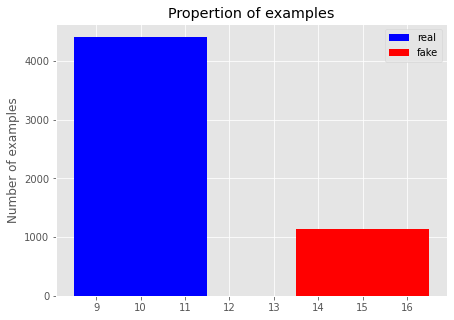

In [ ]:
# Plot to Barchart number fake and real
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="real", color='blue')
plt.bar(15,Not_len,3, label="fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

### Number word in text

In [ ]:
# Function calculator len of each row text
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
# Apply create new columns
df_en['length'] = df_en['text'].apply(length)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


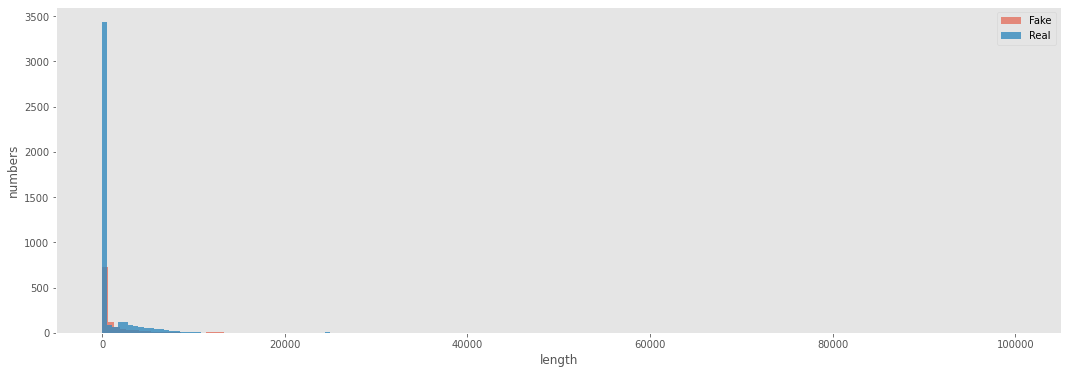

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df_en[df_en['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Fake')
plt.hist(df_en[df_en['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
# plt.xlim(0,4000)
plt.grid()
plt.show()

In [ ]:
df_en['length'].sort_values(ascending=False)

1466    100000
1326    100000
1488    100000
1521     93024
1337     92568
         ...  
1739        11
6431        10
5711        10
6135         8
6419         8
Name: length, Length: 5541, dtype: int64

In [ ]:
df_en = df_en[df_en.length != 0]

In [ ]:
df_en

,statement,text,label,languages,target,length
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en,1,5625
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscape.com:\n...,real,en,1,2205
2,Worldwide Number of COVID19 Cases Over 1 Million,"April 3, 2020 - The global number of coronavir...",real,en,1,565
3,COVID19 Likely Seasonal,"March 27, 2020 - COVID-19 will likely become s...",real,en,1,887
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en,1,1853
...,...,...,...,...,...,...
7405,This is part of our coordinated response to th...,Commissioner @SKyriakidesEU met the Italian Mi...,real,en,1,287
7406,We will provide up to €90 million in funding f...,We are working on all fronts to support effort...,real,en,1,257
7407,Today we are launching the Corona response tea...,We are working around the clock to support EU ...,real,en,1,283
7408,This is our new dedicated webpage on #COVID19 ...,"Statement on the EU’s response, preparedness a...",real,en,1,200


### Common stop word in text

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in df_en[df_en['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

* First we will analyze tweets with class 0.

<BarContainer object of 10 artists>

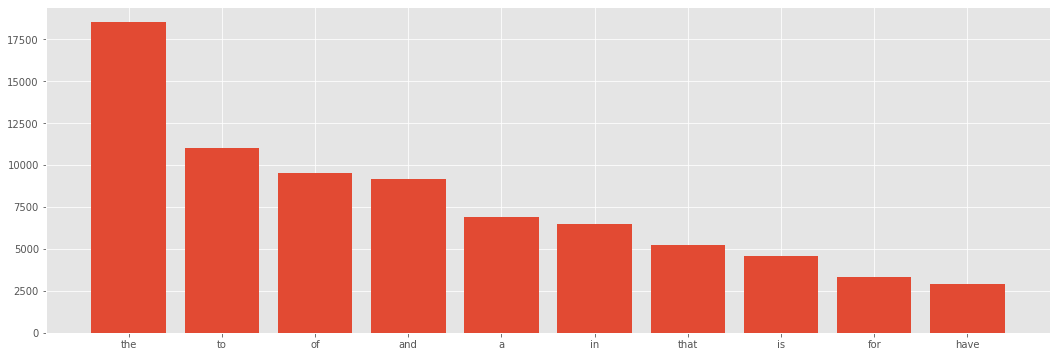

In [ ]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top_fake = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

# Visulize stopword
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_fake)
plt.bar(x,y)

In [ ]:
# displaying the stopwords
np.array(stop)

array({"she's", "you'd", 'once', 'nor', 'theirs', 'being', 'doing', 'why', 'as', 'because', 'above', 'if', 'don', 'down', 'can', 'their', 'mightn', 'off', 'while', 'some', 'below', 'have', 'weren', "you've", 'under', 'its', 'than', 'his', 'couldn', 'themselves', 'which', 'she', 'the', "you'll", 'they', 'herself', 'into', 'or', 'having', "needn't", 'each', 'when', 'ain', 'who', "doesn't", "should've", "aren't", 'hasn', "wasn't", 'an', 'out', 'and', 'then', 'has', 'll', 'now', 'all', 'through', "mightn't", 'is', 'where', 't', 'so', 'against', 'mustn', 'before', 'haven', 'any', 'hers', 'ourselves', 'these', 'no', 'not', 'you', "couldn't", 'had', "weren't", "you're", 'didn', 'to', 'over', 'by', 'did', 'do', 're', "hadn't", 'but', 's', 'just', 'o', "it's", 'won', 'yourself', 'hadn', 'been', 'whom', 'from', 'her', "shan't", 'ours', "mustn't", 'me', "haven't", 'shan', 'only', 'about', 'too', 'was', 'how', 'be', 'very', 'm', 'itself', 'are', 'most', "that'll", 'at', 'more', 'our', 'will', 'her

* Now, we will analyze tweets with class 1.

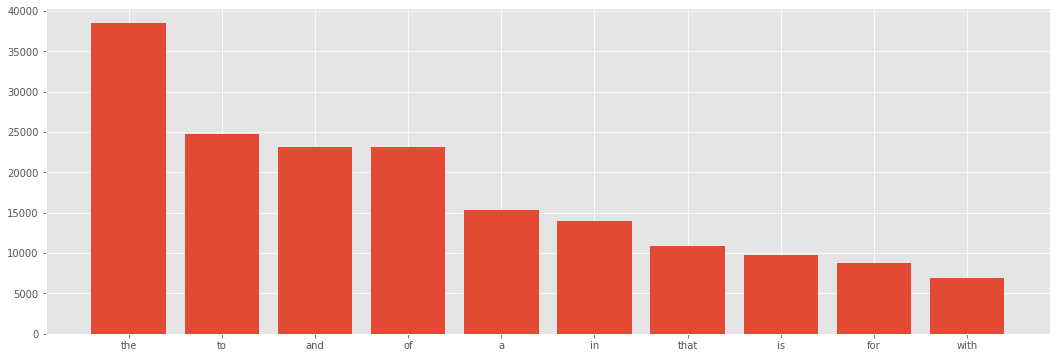

In [ ]:
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top_real = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_real)
plt.bar(x,y)
plt.show()

* In both of them,"the" and "to" dominates which is followed by "of" in class 0 and "and" in class 1.

### Analyzing punctuations

* First let's check in class 1

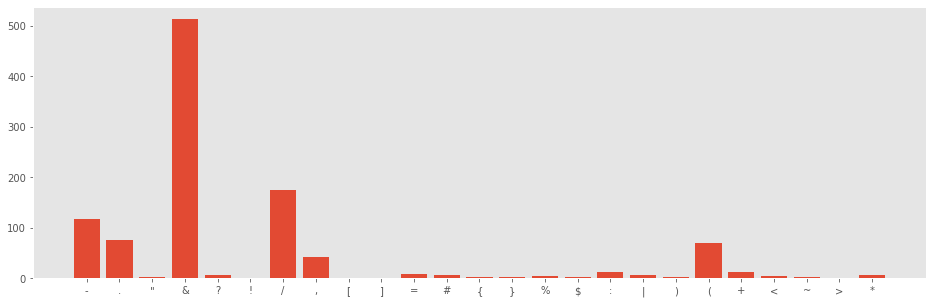

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.grid()
plt.show()

* Now, we will move on to class 0

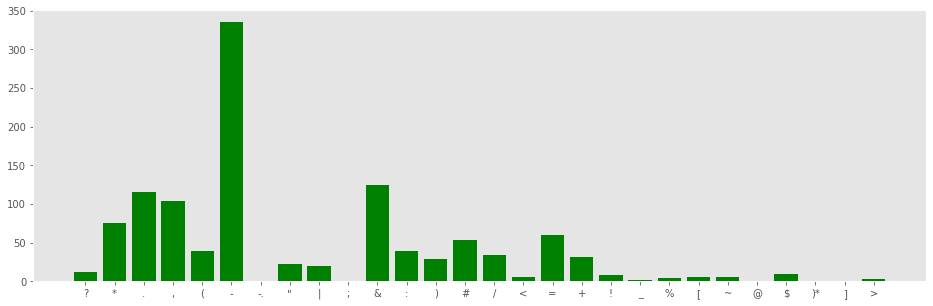

In [ ]:
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')
plt.grid()
plt.show()

* Common Word


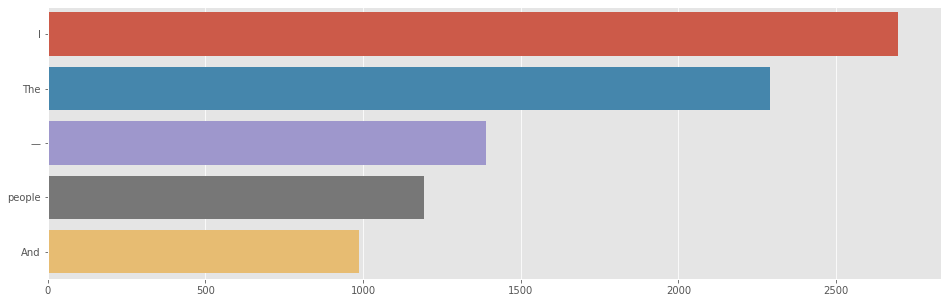

In [ ]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
plt.show()

* we will do a bigram (n=2) analysis over the text. Let's check the most common bigrams in text.

In [ ]:
def get_top_word_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

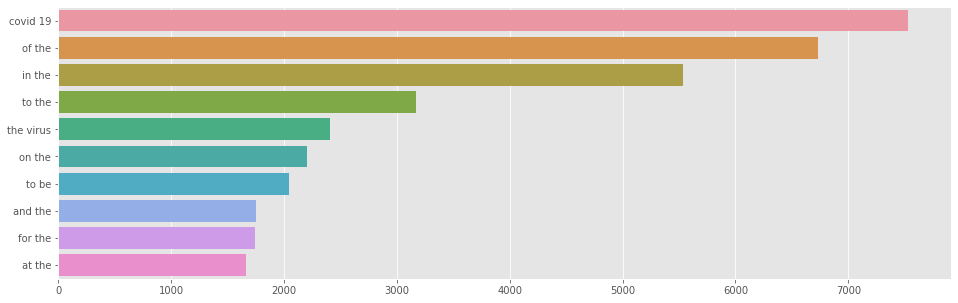

In [ ]:
plt.figure(figsize=(16,5))
top_word_bigrams=get_top_word_bigrams(df_en['text'])[:10]
x,y=map(list,zip(*top_word_bigrams))
sns.barplot(x=y,y=x)

### Removing punctuations

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
df_en['text'] = df_en['text'].apply(lambda x : remove_punct(x))

In [ ]:
df_en['text_without_stopwords'] = df_en['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
def stopwords_lemma_stemming(data):
  newscolumns = ' '.join([word for word in data.split() if word not in (stop)])
  newscolumns = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(newscolumns)])
  newscolumns = stemSentence(newscolumns)
  return newscolumns

In [ ]:
df_en['text_EDA'] = df_en['text'].apply(lambda x: stopwords_lemma_stemming(x))

* Lemma

In [ ]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [ ]:
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemma(x):
  lemma = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)])
  return lemma
  
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
    
def stem(x):
    y = stemSentence(x)
    return y

In [ ]:
df_en['lemma'] = df_en['text_without_stopwords'].apply(lambda x: lemma(x))

In [ ]:
# df_en[df_en['lemma'].str.match('^http.*')== True]

In [ ]:
# df_en[df_en['text'].str.match('^http.*')== True]

In [ ]:
# df_en['text'] = df_en['text'].apply(lambda x: re.sub(r"(^http.*)", "", x))

In [ ]:
df_en.head()

,statement,text,label,languages,target,length,text_without_stopwords,lemma
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en,1,5625,This article Daniel Jolley Pia Lamberty republ...,This article Daniel Jolley Pia Lamberty republ...
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscapecom\n\n...,real,en,1,2205,What doctor reading Medscapecom MARCH 20 2020 ...,What doctor reading Medscapecom MARCH 20 2020 ...
2,Worldwide Number of COVID19 Cases Over 1 Million,April 3 2020 The global number of coronavirus...,real,en,1,565,April 3 2020 The global number coronavirus cas...,April 3 2020 The global number coronavirus cas...
3,COVID19 Likely Seasonal,March 27 2020 COVID19 will likely become seas...,real,en,1,887,March 27 2020 COVID19 likely become seasonal s...,March 27 2020 COVID19 likely become seasonal s...
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en,1,1853,The programs help find need know virus several...,The program help find need know virus several ...


In [ ]:
df_en.isna().sum()

statement                 0
text                      0
label                     0
languages                 0
target                    0
length                    0
text_without_stopwords    0
lemma                     0
stemming                  0
text_EDA                  0
dtype: int64

* Stemming


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
    
def stem(x):
    y=stemSentence(x)
    return y

In [ ]:
df_en['stemming'] = df_en['text_without_stopwords'].apply(lambda x: stem(x))

In [ ]:
df_en.head()

,statement,text,label,languages,target,length,text_without_stopwords,lemma,stemming
0,Coronavirus Is a Breeding Ground for Conspirac...,This article by Daniel Jolley and Pia Lamberty...,real,en,1,5625,This article Daniel Jolley Pia Lamberty republ...,This article Daniel Jolley Pia Lamberty republ...,thi articl daniel jolley pia lamberti republis...
1,COVID19 and PPE Some of Us Will Die,What your doctor is reading on Medscapecom\n\n...,real,en,1,2205,What doctor reading Medscapecom MARCH 20 2020 ...,What doctor reading Medscapecom MARCH 20 2020 ...,what doctor read medscapecom march 20 2020 I r...
2,Worldwide Number of COVID19 Cases Over 1 Million,April 3 2020 The global number of coronavirus...,real,en,1,565,April 3 2020 The global number coronavirus cas...,April 3 2020 The global number coronavirus cas...,april 3 2020 the global number coronaviru case...
3,COVID19 Likely Seasonal,March 27 2020 COVID19 will likely become seas...,real,en,1,887,March 27 2020 COVID19 likely become seasonal s...,March 27 2020 COVID19 likely become seasonal s...,march 27 2020 covid19 like becom season said a...
4,Mobile Apps for Coronavirus COVID19,The programs help you find what you need to kn...,real,en,1,1853,The programs help find need know virus several...,The program help find need know virus several ...,the program help find need know viru sever way...


In [ ]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 7409
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   statement               5537 non-null   object
 1   text                    5537 non-null   object
 2   label                   5537 non-null   object
 3   languages               5537 non-null   object
 4   target                  5537 non-null   int64 
 5   length                  5537 non-null   int64 
 6   text_without_stopwords  5537 non-null   object
 7   lemma                   5537 non-null   object
 8   stemming                5537 non-null   object
dtypes: int64(2), object(7)
memory usage: 432.6+ KB


In [ ]:
df_en.to_csv("fake_real_COVID.csv")

## WordCloud

### Wordcloud in class 1

In [ ]:
def create_corpus_df_en(df_en, target):
    corpus=[]
    
    for x in df_en[df_en['target']==target]['text_without_stopwords'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus_new1=create_corpus_df_en(df_en,1)
len(corpus_new1)

In [ ]:
corpus_new1[:10]

In [ ]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Wordcloud in class 0

In [ ]:
corpus_new0=create_corpus_df_en(df_en,0)
len(corpus_new0)

In [ ]:
corpus_new0[:10]

In [ ]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,10))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
airline_totals_sorted.to_csv("airline_totals_sorted.csv")